In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder

In [15]:
#importing the raw data with hysterisis data 
rawdata = pd.read_csv('Alldatafromperovskitedatabase.csv', low_memory=False, on_bad_lines='warn')
display(rawdata.shape)
#extracting only needed the required features
cols_to_keep = ['ETL_stack_sequence', 'HTL_stack_sequence', 'Perovskite_composition_long_form',
                'Perovskite_composition_none_stoichiometry_components_in_excess', 'Perovskite_additives_compounds',
                'Perovskite_dimension_3D_with_2D_capping_layer',
               'Cell_architecture','JV_scan_speed',
                'JV_reverse_scan_PCE', 'JV_forward_scan_PCE', 'JV_reverse_scan_Voc',
                'JV_reverse_scan_Jsc','JV_reverse_scan_FF','JV_forward_scan_Voc','JV_forward_scan_Jsc','JV_forward_scan_FF' ]
predata = rawdata[cols_to_keep]
#predata=predata.dropna(subset=['JV_scan_speed'],axis=0)
display(predata)

(43379, 410)

,ETL_stack_sequence,HTL_stack_sequence,Perovskite_composition_long_form,Perovskite_composition_none_stoichiometry_components_in_excess,Perovskite_additives_compounds,Perovskite_dimension_3D_with_2D_capping_layer,Cell_architecture,JV_scan_speed,JV_reverse_scan_PCE,JV_forward_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_forward_scan_Voc,JV_forward_scan_Jsc,JV_forward_scan_FF
0,PCBM-60,PEDOT:PSS,MAPbBr3,NaN,NaN,False,pin,NaN,0.00000,0.0,0.050,0.100,0.250,0.010,0.10,0.330
1,TiO2-c | TiO2-mp,PTAA,MAPbI3,NaN,NaN,False,nip,NaN,0.00000,0.0,0.201,0.019,0.318,0.114,0.01,0.215
2,PCBM-60 | BCP,NiO-c,MABi2I9,NaN,NaN,False,pin,NaN,0.00000,0.0,0.000,0.270,0.000,0.000,0.22,0.000
3,TiO2-c,Spiro-MeOTAD,MAPbI3,NaN,Cl,False,nip,125.0,0.00042,0.0,0.010,0.700,0.060,0.010,0.50,0.070
4,ZnO-c,P3HT,CsPbBrI2,CsBr,NaN,False,nip,100.0,NaN,0.0,NaN,NaN,NaN,0.236,0.07,0.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Preproccesing of data using OneHotEncoding
encoder = OneHotEncoder()
#Defining the categorical variables
cat_vars = ['ETL_stack_sequence', 'HTL_stack_sequence', 'Perovskite_composition_long_form',
                'Perovskite_composition_none_stoichiometry_components_in_excess', 'Perovskite_additives_compounds',
                'Perovskite_dimension_3D_with_2D_capping_layer',
               'Cell_architecture']
num_data = predata.drop(cat_vars, axis=1)# seggregating numerical data
num_data.reset_index(inplace=True)
cat_data = encoder.fit_transform(predata[cat_vars])# OneHotEncoding the categorical data
cat_column_names = encoder.get_feature_names_out()
catdata = pd.DataFrame(cat_data.toarray(), columns = cat_column_names)
catdata.reset_index(inplace=True)
data = pd.concat([catdata,num_data],axis=1)
data.reset_index(inplace=True)
#data = data.drop(['level_0','index'],axis=1)
display(data)

,level_0,index,ETL_stack_sequence_(DTYM-NDI-DTYA)2 | BCP,ETL_stack_sequence_(RuCp*mes)2 | C60,ETL_stack_sequence_1‐benzyl‐3‐methylimidazolium chloride,ETL_stack_sequence_2-HI-PVK | PCBM-60 | BCP,ETL_stack_sequence_4-HI-PVK | PCBM-60 | BCP,ETL_stack_sequence_4-methoxythiophenol,ETL_stack_sequence_AZO,ETL_stack_sequence_Ag-np; TiO2-c | TiO2-mp,...,index,JV_scan_speed,JV_reverse_scan_PCE,JV_forward_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_forward_scan_Voc,JV_forward_scan_Jsc,JV_forward_scan_FF
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,0.00000,0.0,0.050,0.100,0.250,0.010,0.10,0.330
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,NaN,0.00000,0.0,0.201,0.019,0.318,0.114,0.01,0.215
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,NaN,0.00000,0.0,0.000,0.270,0.000,0.000,0.22,0.000
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,125.0,0.00042,0.0,0.010,0.700,0.060,0.010,0.50,0.070
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,100.0,NaN,0.0,NaN,NaN,NaN,0.236,0.07,0.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43374,43374,43374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43375,43375,43375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43376,43376,43376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43377,43377,43377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import re
#function to find the sum of numbers in a string
def sum_numbers_in_string(s):
    return np.sum([float(num) for num in re.findall(r'[+-]?\d+\.\d+|\d+', s)])
#function to get the maximum number in a string
def max_number_in_string(s):
    numbers = re.findall(r'[+-]?\d+\.\d+|\d+', s)
    return max(map(float, numbers)) if numbers else np.nan

In [14]:
data = data.dropna(axis=0) #cleaning data points with blank values
print(data.shape)

(4210, 2662)


In [18]:
H_index = (data['JV_reverse_scan_PCE'] - data['JV_forward_scan_PCE']) /data['JV_reverse_scan_PCE'] #calculation of Hystersis index
data['Hysteresis_index'] = H_index
#data.to_excel('Clean_Hystersis_data.xlsx')
display(data)
data_withoutnull = data
data_withoutnull = data_withoutnull.drop(['level_0','index'],axis=1)

,level_0,index,ETL_stack_sequence_(DTYM-NDI-DTYA)2 | BCP,ETL_stack_sequence_(RuCp*mes)2 | C60,ETL_stack_sequence_1‐benzyl‐3‐methylimidazolium chloride,ETL_stack_sequence_2-HI-PVK | PCBM-60 | BCP,ETL_stack_sequence_4-HI-PVK | PCBM-60 | BCP,ETL_stack_sequence_4-methoxythiophenol,ETL_stack_sequence_AZO,ETL_stack_sequence_Ag-np; TiO2-c | TiO2-mp,...,JV_scan_speed,JV_reverse_scan_PCE,JV_forward_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_forward_scan_Voc,JV_forward_scan_Jsc,JV_forward_scan_FF,Hysteresis_index
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.00000,0.0,0.050,0.100,0.250,0.010,0.10,0.330,NaN
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.00000,0.0,0.201,0.019,0.318,0.114,0.01,0.215,NaN
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.00000,0.0,0.000,0.270,0.000,0.000,0.22,0.000,NaN
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,0.00042,0.0,0.010,0.700,0.060,0.010,0.50,0.070,1.0
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,NaN,0.0,NaN,NaN,NaN,0.236,0.07,0.270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43374,43374,43374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43375,43375,43375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43376,43376,43376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43377,43377,43377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data_withoutnull = data_withoutnull.drop(['JV_forward_scan_PCE','JV_forward_scan_Voc','JV_forward_scan_Jsc','JV_forward_scan_FF'],axis=1)
#data_withoutnull.to_excel('Clean_Hystersis_data_with_perovskite_thickness.xlsx')

In [20]:
dataencoded = data_withoutnull.drop(['JV_scan_speed','JV_reverse_scan_PCE','JV_reverse_scan_Voc','JV_reverse_scan_Jsc','JV_reverse_scan_FF','Hysteresis_index'],axis=1)

In [21]:
# Get columns where the sum of 1's (entries) is less than 25
cols_to_remove = [col for col in dataencoded.columns if dataencoded[col].sum() <= 20]

# Remove the rows corresponding to the 1s in the columns to be removed
rows_to_remove_mask = data_withoutnull[cols_to_remove].any(axis=1)
data_withoutnull = data_withoutnull[~rows_to_remove_mask]

# Drop these columns from the DataFrame
data_withoutnull = data_withoutnull.drop(columns=cols_to_remove)

# Remove any remaining null values
data_withoutnull = data_withoutnull.dropna()


In [22]:
display(data_withoutnull)

,ETL_stack_sequence_C60,ETL_stack_sequence_C60 | BCP,ETL_stack_sequence_CPTA | BACl,ETL_stack_sequence_PAA | PCBM-60 | BCP,ETL_stack_sequence_PCBM-60,ETL_stack_sequence_PCBM-60 | BCP,ETL_stack_sequence_PCBM-60 | Bphen,ETL_stack_sequence_PCBM-60 | C60 | BCP,ETL_stack_sequence_PCBM-60 | LiF,ETL_stack_sequence_PCBM-60 | PEI,...,Cell_architecture_Unknown,Cell_architecture_nip,Cell_architecture_pin,Cell_architecture_nan,JV_scan_speed,JV_reverse_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,Hysteresis_index
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,125.0,0.00042,0.010,0.700,0.060,1.000000
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50.0,0.03010,0.542,0.165,0.336,0.239203
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,20.0,0.06000,0.870,0.380,0.180,0.166667
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,20.0,0.07000,0.880,0.480,0.170,0.142857
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,10.0,21.54000,1.186,23.250,0.782,0.030641
9300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,10.0,21.54000,1.186,23.250,0.782,0.030641
9306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50.0,20.90000,1.151,23.000,0.789,0.000000
9386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,10.0,21.60000,1.180,22.800,0.810,-0.009259


In [23]:
data_withoutnull.to_excel('clen data _2.xlsx')

[]

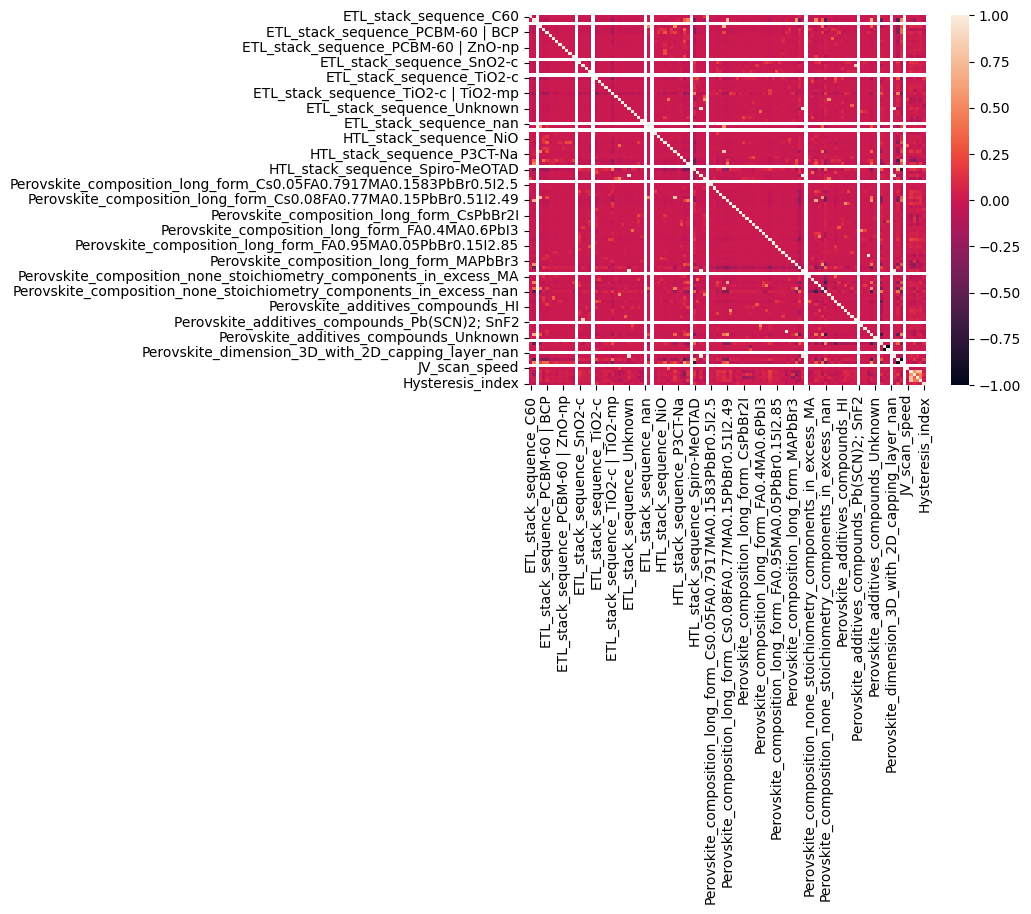

In [25]:
cormatrix = data_withoutnull.corr()
sn.heatmap(cormatrix)
plt.plot()

In [26]:
filtered_data = data_withoutnull[data_withoutnull['Hysteresis_index'] >= 0]

print("Filtered DataFrame:")
print(filtered_data.shape)
filtered_data.to_excel('Final_clean_data.xlsx')

Filtered DataFrame:
(1813, 121)


In [27]:
# Load the Excel file
df = pd.read_excel('Final_clean_data.xlsx')  # Update the path and sheet name as needed
display(df)

,Unnamed: 0,ETL_stack_sequence_C60,ETL_stack_sequence_C60 | BCP,ETL_stack_sequence_CPTA | BACl,ETL_stack_sequence_PAA | PCBM-60 | BCP,ETL_stack_sequence_PCBM-60,ETL_stack_sequence_PCBM-60 | BCP,ETL_stack_sequence_PCBM-60 | Bphen,ETL_stack_sequence_PCBM-60 | C60 | BCP,ETL_stack_sequence_PCBM-60 | LiF,...,Cell_architecture_Unknown,Cell_architecture_nip,Cell_architecture_pin,Cell_architecture_nan,JV_scan_speed,JV_reverse_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,Hysteresis_index
0,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,125.0,0.00042,0.010,0.700,0.060,1.000000
1,24,0,0,0,0,0,0,0,0,0,...,0,1,0,0,50.0,0.03010,0.542,0.165,0.336,0.239203
2,32,0,0,0,0,0,0,0,0,0,...,0,1,0,0,20.0,0.06000,0.870,0.380,0.180,0.166667
3,37,0,0,0,0,0,0,0,0,0,...,0,1,0,0,20.0,0.07000,0.880,0.480,0.170,0.142857
4,39,0,0,0,0,0,0,0,0,0,...,0,1,0,0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,9292,0,0,0,1,0,0,0,0,0,...,0,0,1,0,40.0,21.02000,1.074,24.317,0.805,0.009515
1809,9299,0,0,0,0,0,0,0,0,0,...,0,1,0,0,10.0,21.54000,1.186,23.250,0.782,0.030641
1810,9300,0,0,0,0,0,0,0,0,0,...,0,1,0,0,10.0,21.54000,1.186,23.250,0.782,0.030641
1811,9306,0,0,0,0,0,0,0,0,0,...,0,1,0,0,50.0,20.90000,1.151,23.000,0.789,0.000000


In [28]:
df =df.drop(['Unnamed: 0'], axis=1)
display(df)

,ETL_stack_sequence_C60,ETL_stack_sequence_C60 | BCP,ETL_stack_sequence_CPTA | BACl,ETL_stack_sequence_PAA | PCBM-60 | BCP,ETL_stack_sequence_PCBM-60,ETL_stack_sequence_PCBM-60 | BCP,ETL_stack_sequence_PCBM-60 | Bphen,ETL_stack_sequence_PCBM-60 | C60 | BCP,ETL_stack_sequence_PCBM-60 | LiF,ETL_stack_sequence_PCBM-60 | PEI,...,Cell_architecture_Unknown,Cell_architecture_nip,Cell_architecture_pin,Cell_architecture_nan,JV_scan_speed,JV_reverse_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,Hysteresis_index
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,125.0,0.00042,0.010,0.700,0.060,1.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,50.0,0.03010,0.542,0.165,0.336,0.239203
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,20.0,0.06000,0.870,0.380,0.180,0.166667
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,20.0,0.07000,0.880,0.480,0.170,0.142857
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,40.0,21.02000,1.074,24.317,0.805,0.009515
1809,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,10.0,21.54000,1.186,23.250,0.782,0.030641
1810,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,10.0,21.54000,1.186,23.250,0.782,0.030641
1811,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,50.0,20.90000,1.151,23.000,0.789,0.000000


In [29]:

# Calculate the sum of all columns
column_sums = df.sum()

# Print the sum of each column with the column name
for col_name, col_sum in column_sums.items():
    print(f"{col_name}: {col_sum}")


ETL_stack_sequence_C60: 28.0
ETL_stack_sequence_C60 | BCP: 165.0
ETL_stack_sequence_CPTA | BACl: 0.0
ETL_stack_sequence_PAA | PCBM-60 | BCP: 26.0
ETL_stack_sequence_PCBM-60: 103.0
ETL_stack_sequence_PCBM-60 | BCP: 87.0
ETL_stack_sequence_PCBM-60 | Bphen: 3.0
ETL_stack_sequence_PCBM-60 | C60 | BCP: 3.0
ETL_stack_sequence_PCBM-60 | LiF: 22.0
ETL_stack_sequence_PCBM-60 | PEI: 5.0
ETL_stack_sequence_PCBM-60 | ZnO-np: 3.0
ETL_stack_sequence_PCBM-60 | Zr(acac)4: 4.0
ETL_stack_sequence_PCBM-60 | bis-C60: 5.0
ETL_stack_sequence_PCBM-70: 7.0
ETL_stack_sequence_SnO2: 0.0
ETL_stack_sequence_SnO2-c: 58.0
ETL_stack_sequence_SnO2-c | C60-SAM: 20.0
ETL_stack_sequence_SnO2-c | PCBM-60: 13.0
ETL_stack_sequence_SnO2-np: 52.0
ETL_stack_sequence_SnO2-np | PCBM-60: 0.0
ETL_stack_sequence_TiO2-c: 347.0
ETL_stack_sequence_TiO2-c | Al2O3-mp: 5.0
ETL_stack_sequence_TiO2-c | C60: 14.0
ETL_stack_sequence_TiO2-c | PCBM-60: 31.0
ETL_stack_sequence_TiO2-c | SnO2-np: 3.0
ETL_stack_sequence_TiO2-c | TiO2-mp: 643.0
ET

In [30]:

# Calculate the sum of all columns
column_sums = df.sum()

# Print the sum of each column with the column name
for col_name, col_sum in column_sums.items():
    print(f"{col_name}: {col_sum}")


ETL_stack_sequence_C60: 28.0
ETL_stack_sequence_C60 | BCP: 165.0
ETL_stack_sequence_CPTA | BACl: 0.0
ETL_stack_sequence_PAA | PCBM-60 | BCP: 26.0
ETL_stack_sequence_PCBM-60: 103.0
ETL_stack_sequence_PCBM-60 | BCP: 87.0
ETL_stack_sequence_PCBM-60 | Bphen: 3.0
ETL_stack_sequence_PCBM-60 | C60 | BCP: 3.0
ETL_stack_sequence_PCBM-60 | LiF: 22.0
ETL_stack_sequence_PCBM-60 | PEI: 5.0
ETL_stack_sequence_PCBM-60 | ZnO-np: 3.0
ETL_stack_sequence_PCBM-60 | Zr(acac)4: 4.0
ETL_stack_sequence_PCBM-60 | bis-C60: 5.0
ETL_stack_sequence_PCBM-70: 7.0
ETL_stack_sequence_SnO2: 0.0
ETL_stack_sequence_SnO2-c: 58.0
ETL_stack_sequence_SnO2-c | C60-SAM: 20.0
ETL_stack_sequence_SnO2-c | PCBM-60: 13.0
ETL_stack_sequence_SnO2-np: 52.0
ETL_stack_sequence_SnO2-np | PCBM-60: 0.0
ETL_stack_sequence_TiO2-c: 347.0
ETL_stack_sequence_TiO2-c | Al2O3-mp: 5.0
ETL_stack_sequence_TiO2-c | C60: 14.0
ETL_stack_sequence_TiO2-c | PCBM-60: 31.0
ETL_stack_sequence_TiO2-c | SnO2-np: 3.0
ETL_stack_sequence_TiO2-c | TiO2-mp: 643.0
ET

In [37]:
# Calculate the sum of all columns
column_sums = df.sum()

# Identify columns with sum less than 15
cols_to_remove = column_sums[column_sums < 25].index.tolist()

# Remove rows where the entry is 1 in the identified columns
for col in cols_to_remove:
    df = df[df[col] != 1]

# Optionally, drop these columns if they are no longer needed
df = df.drop(columns=cols_to_remove)

# Print the resulting DataFrame
#print(df)
display(df)

,ETL_stack_sequence_C60,ETL_stack_sequence_C60 | BCP,ETL_stack_sequence_PAA | PCBM-60 | BCP,ETL_stack_sequence_PCBM-60,ETL_stack_sequence_PCBM-60 | BCP,ETL_stack_sequence_SnO2-c,ETL_stack_sequence_SnO2-np,ETL_stack_sequence_TiO2-c,ETL_stack_sequence_TiO2-c | PCBM-60,ETL_stack_sequence_TiO2-c | TiO2-mp,...,Perovskite_additives_compounds_nan,Perovskite_dimension_3D_with_2D_capping_layer_False,Cell_architecture_nip,Cell_architecture_pin,JV_scan_speed,JV_reverse_scan_PCE,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,Hysteresis_index
0,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,125.0,0.00042,0.010,0.700,0.060,1.000000
1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,50.0,0.03010,0.542,0.165,0.336,0.239203
2,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,20.0,0.06000,0.870,0.380,0.180,0.166667
3,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,20.0,0.07000,0.880,0.480,0.170,0.142857
4,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,20.0,20.83000,1.138,23.670,0.770,0.017763
1806,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,40.0,21.09000,1.088,23.997,0.807,0.020863
1808,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,40.0,21.02000,1.074,24.317,0.805,0.009515
1809,0,0,0,0,0,1,0,0,0,0,...,1,1,1,0,10.0,21.54000,1.186,23.250,0.782,0.030641


In [38]:

# Calculate the sum of all columns
column_sums = df.sum()

# Print the sum of each column with the column name
for col_name, col_sum in column_sums.items():
    print(f"{col_name}: {col_sum}")


ETL_stack_sequence_C60: 27.0
ETL_stack_sequence_C60 | BCP: 156.0
ETL_stack_sequence_PAA | PCBM-60 | BCP: 26.0
ETL_stack_sequence_PCBM-60: 74.0
ETL_stack_sequence_PCBM-60 | BCP: 71.0
ETL_stack_sequence_SnO2-c: 45.0
ETL_stack_sequence_SnO2-np: 28.0
ETL_stack_sequence_TiO2-c: 265.0
ETL_stack_sequence_TiO2-c | PCBM-60: 29.0
ETL_stack_sequence_TiO2-c | TiO2-mp: 494.0
HTL_stack_sequence_2PACz: 25.0
HTL_stack_sequence_NiO-c: 43.0
HTL_stack_sequence_NiO-np | Meo-2PACz: 30.0
HTL_stack_sequence_PEDOT:PSS: 154.0
HTL_stack_sequence_PTAA: 111.0
HTL_stack_sequence_Spiro-MeOTAD: 794.0
HTL_stack_sequence_Spiro-MeOTAD | PEDOT:PSS: 31.0
HTL_stack_sequence_none: 27.0
Perovskite_composition_long_form_Cs0.05FA0.79MA0.16PbBr0.51I2.49: 49.0
Perovskite_composition_long_form_Cs0.05FA0.91MA0.04PbBr0.15I2.85: 52.0
Perovskite_composition_long_form_Cs0.08FA0.77MA0.15PbBr0.51I2.49: 90.0
Perovskite_composition_long_form_FA0.85MA0.15PbBr0.45I2.55: 120.0
Perovskite_composition_long_form_FAPbI3: 25.0
Perovskite_composi

In [39]:
df.to_excel('Final_clean_data.xlsx')